# Clean and display the three datasets (EHR, GDP, Income)

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns


# load GDP dataset
df_GDP = pd.read_csv('GDP_CA_2001_2020.csv')
df_GDP.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""06000""",California,8.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.692324e+09,1.722522e+09,...,2.063828e+09,2.113096e+09,2.179229e+09,2.256055e+09,2.357453e+09,2.427895e+09,2.541769e+09,2.643576e+09,2.739343e+09,2.663666e+09
1,"""06000""",California,8.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,8.008700e+01,8.151700e+01,...,9.766800e+01,1.000000e+02,1.031300e+02,1.067650e+02,1.115640e+02,1.148970e+02,1.202860e+02,1.251040e+02,1.296360e+02,1.260550e+02
2,"""06000""",California,8.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.375761e+09,1.418430e+09,...,2.023500e+09,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09,3.007188e+09
3,"""06001""","Alameda, CA",8.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,8.179943e+07,8.258638e+07,...,9.320961e+07,9.574948e+07,9.866994e+07,1.023338e+08,1.094216e+08,1.129437e+08,1.191171e+08,1.237183e+08,1.261836e+08,1.217090e+08
4,"""06001""","Alameda, CA",8.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,8.543100e+01,8.625300e+01,...,9.734700e+01,1.000000e+02,1.030500e+02,1.068770e+02,1.142790e+02,1.179580e+02,1.244050e+02,1.292100e+02,1.317850e+02,1.271120e+02


In [88]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GeoFIPS                 181 non-null    object 
 1   GeoName                 177 non-null    object 
 2   Region                  177 non-null    float64
 3   TableName               177 non-null    object 
 4   LineCode                177 non-null    float64
 5   IndustryClassification  177 non-null    object 
 6   Description             177 non-null    object 
 7   Unit                    177 non-null    object 
 8   2001                    177 non-null    float64
 9   2002                    177 non-null    float64
 10  2003                    177 non-null    float64
 11  2004                    177 non-null    float64
 12  2005                    177 non-null    float64
 13  2006                    177 non-null    float64
 14  2007                    177 non-null    fl

In [89]:
df_GDP.describe()

,Region,LineCode,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,177.0,177.000000,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,...,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,8.0,2.000000,3.468765e+07,3.552719e+07,3.718282e+07,3.889249e+07,4.099984e+07,4.313326e+07,4.454368e+07,4.529435e+07,...,4.618526e+07,4.775363e+07,4.971368e+07,5.188148e+07,5.458981e+07,5.647088e+07,5.958153e+07,6.259023e+07,6.545566e+07,6.409773e+07
std,0.0,0.818813,1.699176e+08,1.738176e+08,1.817864e+08,1.899086e+08,1.998052e+08,2.100903e+08,2.167973e+08,2.205643e+08,...,2.250071e+08,2.324972e+08,2.419280e+08,2.524382e+08,2.657108e+08,2.748022e+08,2.898891e+08,3.045556e+08,3.186079e+08,3.116377e+08
min,8.0,1.000000,5.938200e+01,5.681400e+01,6.015900e+01,6.253500e+01,6.649600e+01,7.155500e+01,7.583900e+01,7.607400e+01,...,8.207300e+01,1.000000e+02,9.313200e+01,8.916500e+01,9.017200e+01,9.650500e+01,9.103100e+01,9.154400e+01,9.107600e+01,9.207800e+01
25%,8.0,1.000000,9.166500e+01,9.896600e+01,9.948900e+01,1.011600e+02,1.033000e+02,1.061110e+02,1.058010e+02,1.039260e+02,...,1.046980e+02,1.000000e+02,1.037400e+02,1.068900e+02,1.114700e+02,1.158850e+02,1.202860e+02,1.222820e+02,1.275750e+02,1.248210e+02
50%,8.0,2.000000,1.118369e+06,1.229494e+06,1.254471e+06,1.354372e+06,1.419893e+06,1.481254e+06,1.486497e+06,1.452987e+06,...,1.441492e+06,1.382695e+06,1.440258e+06,1.488434e+06,1.576129e+06,1.624237e+06,1.732487e+06,1.786296e+06,1.870309e+06,1.848108e+06
75%,8.0,3.000000,1.140431e+07,1.216344e+07,1.241956e+07,1.306165e+07,1.419982e+07,1.488086e+07,1.539080e+07,1.555348e+07,...,1.602862e+07,1.671216e+07,1.760231e+07,1.836294e+07,1.923534e+07,1.962348e+07,2.063280e+07,2.123421e+07,2.165822e+07,2.143904e+07
max,8.0,3.000000,1.692324e+09,1.722522e+09,1.789999e+09,1.850904e+09,1.926842e+09,2.002437e+09,2.041192e+09,2.061639e+09,...,2.063828e+09,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09,3.007188e+09


In [90]:
# clean the noisy data
df_GDP['GeoName'] = df_GDP['GeoName'].str.rstrip(', CA')
df_GDP.drop(df_GDP.tail(4).index,inplace=True) # drop last n rows
df_GDP = df_GDP.drop(['GeoFIPS','Region','TableName','LineCode','IndustryClassification'],axis=1)
df_GDP = df_GDP[df_GDP.Description == 'Current-dollar GDP (thousands of current dollars)']
df_GDP = df_GDP.drop(df_GDP.columns[3:14],axis=1)
df_GDP = df_GDP.dropna()
df_GDP = df_GDP.drop(df_GDP.columns[-1:],axis=1)
df_GDP = df_GDP.drop(df_GDP.columns[1:2],axis=1)

In [91]:
df_GDP.head()

,GeoName,Unit,2012,2013,2014,2015,2016,2017,2018,2019
2,California,Thousands of dollars,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09
5,Alameda,Thousands of dollars,9.574948e+07,1.005214e+08,1.059368e+08,1.157918e+08,1.210535e+08,1.290289e+08,1.361689e+08,1.418886e+08
8,Alpine,Thousands of dollars,9.529400e+04,9.392700e+04,1.027050e+05,1.085030e+05,1.092630e+05,1.108430e+05,1.140550e+05,1.219480e+05
11,Amador,Thousands of dollars,1.365613e+06,1.440258e+06,1.488434e+06,1.551133e+06,1.617941e+06,1.732487e+06,1.786296e+06,1.870309e+06
14,Butte,Thousands of dollars,7.363012e+06,7.602095e+06,7.634930e+06,8.041364e+06,8.649007e+06,9.189787e+06,9.500527e+06,9.893227e+06


In [92]:
# load EHR dataset
df_EHR = pd.read_csv('EHR_Incentive_Program_Payments_-_Providers.csv')
df_EHR.head()

,X,Y,OBJECTID,Provider_N,NPI,Medicaid_E,Specialty,Business_S,Business_C,Business_1,...,Program_Ye,Payment_Ye,Payment__1,Payment_Cr,Payee_Name,Payee_NPI,total_paym,total_rece,Latitude,Longitude
0,-121.376390,38.556297,1,"Choti, Supak",1003003781,Dentist,UNKNOWN,8890 Cal Center Drive,Sacramento,Sacramento,...,2018,2019,3,MU,DINSHAW SARKARI ADC CHERAG,1821152562,38250.0,8500.0,38.556297,-121.376390
1,-122.242829,37.781795,2,"Sheikh, Mohammad",1003009077,Physician,PSYCHIATRY,2000 Embarcadero Ste 101,Oakland,Alameda,...,2013,2014,1,AIU,of Alameda County,1659402303,21250.0,21250.0,37.781795,-122.242829
2,-121.805015,37.983654,3,"vontela, rekha",1003009440,Dentist,UNKNOWN,"3737 Lone Tree Way, suite F",Antioch,Contra Costa,...,2015,2016,1,AIU,Designated Payee Name not Found,1427388875,21250.0,21250.0,37.983654,-121.805014
3,-117.265614,34.050607,4,"Pardo, Andrea",1003010059,Physician,UNKNOWN,"11175 Campus St, Room A1120C",Loma Linda,San Bernardino,...,2014,2015,2,MU,PHYSICIANS FACULTY,1275583007,29750.0,8500.0,34.050607,-117.265614
4,-117.867478,33.779086,5,"Lim, kyung A",1003010372,Dentist,UNKNOWN,530 South Main St.,Orange,Orange,...,2013,2014,1,AIU,Dental Western,1477627156,21250.0,21250.0,33.779086,-117.867478


In [93]:
df_EHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25691 entries, 0 to 25690
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           25691 non-null  float64
 1   Y           25691 non-null  float64
 2   OBJECTID    25691 non-null  int64  
 3   Provider_N  25691 non-null  object 
 4   NPI         25691 non-null  int64  
 5   Medicaid_E  25691 non-null  object 
 6   Specialty   25691 non-null  object 
 7   Business_S  25691 non-null  object 
 8   Business_C  25691 non-null  object 
 9   Business_1  25691 non-null  object 
 10  Business_Z  25691 non-null  int64  
 11  Business_2  25691 non-null  object 
 12  Program_Ye  25691 non-null  int64  
 13  Payment_Ye  25691 non-null  int64  
 14  Payment__1  25691 non-null  int64  
 15  Payment_Cr  25691 non-null  object 
 16  Payee_Name  25691 non-null  object 
 17  Payee_NPI   25691 non-null  int64  
 18  total_paym  25691 non-null  float64
 19  total_rece  25691 non-nul

In [94]:
df_EHR.describe()

,X,Y,OBJECTID,NPI,Business_Z,Program_Ye,Payment_Ye,Payment__1,Payee_NPI,total_paym,total_rece,Latitude,Longitude
count,25691.000000,25691.000000,25691.000000,2.569100e+04,25691.000000,25691.000000,25691.000000,25691.000000,2.569100e+04,25691.000000,25691.000000,25691.000000,25691.000000
mean,-119.547305,35.556689,12846.000000,1.500277e+09,92890.083531,2014.997976,2015.902067,2.196917,1.471618e+09,30993.723676,15284.829258,35.556689,-119.547305
std,2.023064,2.098932,7416.497219,2.870431e+08,1845.851756,2.440749,2.415981,1.630466,2.782789e+08,13789.971202,6402.156462,2.098932,2.023064
min,-124.261685,32.558280,1.000000,1.003004e+09,90001.000000,2011.000000,2012.000000,1.000000,1.003001e+09,0.000000,0.000000,32.558280,-124.261685
25%,-121.878240,33.931861,6423.500000,1.255367e+09,91353.500000,2013.000000,2014.000000,1.000000,1.245343e+09,21250.000000,8500.000000,33.931861,-121.878240
50%,-118.445983,34.219683,12846.000000,1.508020e+09,92868.000000,2015.000000,2016.000000,1.000000,1.447262e+09,21250.000000,21250.000000,34.219683,-118.445983
75%,-117.975432,37.756332,19268.500000,1.745514e+09,94553.000000,2017.000000,2018.000000,3.000000,1.689864e+09,38250.000000,21250.000000,37.756332,-117.975432
max,-114.599924,41.964287,25691.000000,1.993000e+09,96161.000000,2020.000000,2020.000000,6.000000,1.992998e+09,63750.000000,21250.000000,41.964287,-114.599924


In [95]:
# clean the noisy data
df_EHR = df_EHR.drop(df_EHR.columns[0:9], axis=1)
df_EHR = df_EHR.drop(df_EHR.columns[1:3], axis=1)
df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_EHR = df_EHR.dropna()

In [96]:
df_EHR['Payment_Ye'] = df_EHR['Payment_Ye'].apply(lambda x: str(x))

In [97]:
df_EHR.head()

,Business_1,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Alameda,2014,21250.0
2,Contra Costa,2016,21250.0
3,San Bernardino,2015,29750.0
4,Orange,2014,21250.0


In [98]:
# load median income dataset
df_income = pd.read_excel('B-6__Comparison_By_County.xlsx')
df_income.head()

,Taxable Year,County,Population,All Returns,AGI,Median Income,Median Rank,Joint Returns,Joint Returns Median Income,Joint Returns Median Rank,Tax Assessed,Latitude,Longitude,New Georeferenced Column
0,2017,Nonresident,NaN,756843,32798066000,14600,NaN,371420,20592,NaN,3713047000,0.000000,0.00000,POINT (0 0)
1,2012,Unallocated,0.0,2885,580682000,51249,0.0,1194,127511,0.0,19336000,0.000000,0.00000,POINT (0 0)
2,2010,Unallocated,0.0,2880,287037000,36227,0.0,1041,86697,0.0,12616000,0.000000,0.00000,POINT (0 0)
3,2006,Unallocated,0.0,3710,392781000,31384,0.0,1260,70468,0.0,14728000,0.000000,0.00000,POINT (0 0)
4,1995,Ventura,712700.0,281369,11450530000,26210,10.0,133610,47458,9.0,414669000,34.277091,-119.21785,POINT (-119.2178496 34.27709072)


In [99]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Taxable Year                 1525 non-null   int64  
 1   County                       1525 non-null   object 
 2   Population                   1516 non-null   float64
 3   All Returns                  1525 non-null   int64  
 4   AGI                          1525 non-null   int64  
 5   Median Income                1525 non-null   int64  
 6   Median Rank                  1516 non-null   float64
 7   Joint Returns                1525 non-null   int64  
 8   Joint Returns Median Income  1525 non-null   int64  
 9   Joint Returns Median Rank    1516 non-null   float64
 10  Tax Assessed                 1525 non-null   int64  
 11  Latitude                     1525 non-null   float64
 12  Longitude                    1525 non-null   float64
 13  New Georeferenced 

In [100]:
df_income.describe()

,Taxable Year,Population,All Returns,AGI,Median Income,Median Rank,Joint Returns,Joint Returns Median Income,Joint Returns Median Rank,Tax Assessed,Latitude,Longitude
count,1525.000000,1.516000e+03,1.525000e+03,1.525000e+03,1525.000000,1516.000000,1.525000e+03,1525.00000,1516.000000,1.525000e+03,1525.000000,1525.000000
mean,2007.000000,6.054195e+05,2.518661e+05,1.854484e+10,33192.744262,28.215699,9.804150e+04,60750.32918,28.215699,8.113302e+08,35.958091,-114.839606
std,7.213468,1.394779e+06,5.528343e+05,4.269146e+10,9011.930707,17.449568,1.930520e+05,21335.52830,17.449568,1.989108e+09,8.447037,26.197287
min,1995.000000,0.000000e+00,2.770000e+02,9.078000e+06,14567.000000,0.000000,1.050000e+02,19743.00000,0.000000,2.500000e+05,0.000000,-123.892004
25%,2001.000000,3.713200e+04,1.736300e+04,7.245640e+08,27317.000000,13.000000,8.477000e+03,46568.00000,13.000000,2.136200e+07,36.324707,-122.078097
50%,2007.000000,1.584055e+05,6.792300e+04,3.340652e+09,31725.000000,28.000000,3.164000e+04,56254.00000,28.000000,1.127690e+08,37.988180,-120.943072
75%,2013.000000,5.321470e+05,2.348310e+05,1.480678e+10,37345.000000,43.000000,1.002580e+05,69374.00000,43.000000,6.101010e+08,39.167981,-119.698820
max,2019.000000,1.039941e+07,4.653590e+06,3.996088e+11,74077.000000,58.000000,1.370633e+06,178755.00000,58.000000,2.114381e+10,41.713682,0.000000


In [101]:
# clean the noisy data
df_income = df_income[(df_income["Taxable Year"]>=2012) & (df_income["Taxable Year"]<=2019)]
df_income["Taxable Year"].unique()

array([2017, 2012, 2019, 2015, 2013, 2016, 2018, 2014])

In [102]:
df_income['Taxable Year'] = df_income['Taxable Year'].apply(lambda x: str(x))
df_income = df_income.drop(df_income.columns[[3,4,6,7,8,9,10,11,12,13]], axis=1)
df_income.head()

,Taxable Year,County,Population,Median Income
0,2017,Nonresident,NaN,14600
1,2012,Unallocated,0.0,51249
8,2019,San Benito,62789.0,47341
12,2017,Shasta,178240.0,35365
14,2015,Los Angeles,10185487.0,33369


# Aggregate the datasets

In [103]:
df_GDP = df_GDP.groupby(['GeoName','Unit']).sum().reset_index()
df_GDP.head(5)

,GeoName,Unit,2012,2013,2014,2015,2016,2017,2018,2019
0,Alameda,Thousands of dollars,95749481.0,100521444.0,105936777.0,115791781.0,121053460.0,129028899.0,136168877.0,141888634.0
1,Alpine,Thousands of dollars,95294.0,93927.0,102705.0,108503.0,109263.0,110843.0,114055.0,121948.0
2,Amador,Thousands of dollars,1365613.0,1440258.0,1488434.0,1551133.0,1617941.0,1732487.0,1786296.0,1870309.0
3,Butte,Thousands of dollars,7363012.0,7602095.0,7634930.0,8041364.0,8649007.0,9189787.0,9500527.0,9893227.0
4,Calaveras,Thousands of dollars,1050964.0,1044218.0,1172626.0,1246769.0,1362303.0,1442782.0,1415632.0,1661687.0


In [104]:
df_EHR = df_EHR.groupby(['Business_1','Payment_Ye']).sum().reset_index()
df_EHR.tail()

,Business_1,Payment_Ye,total_paym
454,Yuba,2014,255000.0
455,Yuba,2015,76500.0
456,Yuba,2017,552500.0
457,Yuba,2018,187000.0
458,Yuba,2019,63750.0


# Reshape the dataset (GDP) from wide format to long format

In [105]:
year_list = df_GDP.columns[3:]
df_GDP = pd.melt(df_GDP, id_vars=['GeoName','Unit'], value_vars=year_list) #Pandas.melt() unpivots a DataFrame from wide format to long format
df_GDP.head()

,GeoName,Unit,variable,value
0,Alameda,Thousands of dollars,2013,100521444.0
1,Alpine,Thousands of dollars,2013,93927.0
2,Amador,Thousands of dollars,2013,1440258.0
3,Butte,Thousands of dollars,2013,7602095.0
4,Calaveras,Thousands of dollars,2013,1044218.0


# Change the column names

In [106]:
df_GDP = df_GDP.rename({'GeoName':'County','Unit': 'Unit of GDP', 'variable': 'Year', 'value':'GDP'}, axis=1) 
df_GDP.head()

,County,Unit of GDP,Year,GDP
0,Alameda,Thousands of dollars,2013,100521444.0
1,Alpine,Thousands of dollars,2013,93927.0
2,Amador,Thousands of dollars,2013,1440258.0
3,Butte,Thousands of dollars,2013,7602095.0
4,Calaveras,Thousands of dollars,2013,1044218.0


In [107]:
df_EHR = df_EHR.rename({'Business_1':'County'}, axis=1) 
df_EHR.head()

,County,Payment_Ye,total_paym
0,Alameda,2012,5581667.00
1,Alameda,2013,3315000.00
2,Alameda,2014,4009166.68
3,Alameda,2015,4862000.00
4,Alameda,2016,3476500.00


# Combine the datasets

In [108]:
df = df_GDP.merge(df_EHR, how='inner', left_on=['County', 'Year'], right_on=['County', 'Payment_Ye'])
df.head()

,County,Unit of GDP,Year,GDP,Payment_Ye,total_paym
0,Alameda,Thousands of dollars,2013,100521444.0,2013,3315000.0
1,Amador,Thousands of dollars,2013,1440258.0,2013,85000.0
2,Butte,Thousands of dollars,2013,7602095.0,2013,590750.0
3,Calaveras,Thousands of dollars,2013,1044218.0,2013,21250.0
4,Colusa,Thousands of dollars,2013,1322530.0,2013,21250.0


In [109]:
df = df.merge(df_income, how='inner', left_on=['County', 'Year'], right_on=['County', 'Taxable Year'])
df.head()

,County,Unit of GDP,Year,GDP,Payment_Ye,total_paym,Taxable Year,Population,Median Income
0,Alameda,Thousands of dollars,2013,100521444.0,2013,3315000.0,2013,1563495.0,46217
1,Amador,Thousands of dollars,2013,1440258.0,2013,85000.0,2013,36028.0,37846
2,Butte,Thousands of dollars,2013,7602095.0,2013,590750.0,2013,221416.0,31630
3,Calaveras,Thousands of dollars,2013,1044218.0,2013,21250.0,2013,44852.0,37833
4,Colusa,Thousands of dollars,2013,1322530.0,2013,21250.0,2013,21665.0,31123


In [110]:
df = df.drop(df.columns[[4,6]],axis=1)

In [111]:
# swap the columns
cols = list(df.columns)
a, b = cols.index('Unit of GDP'), cols.index('Year')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

In [112]:
df.head()

,County,Year,Unit of GDP,GDP,total_paym,Population,Median Income
0,Alameda,2013,Thousands of dollars,100521444.0,3315000.0,1563495.0,46217
1,Amador,2013,Thousands of dollars,1440258.0,85000.0,36028.0,37846
2,Butte,2013,Thousands of dollars,7602095.0,590750.0,221416.0,31630
3,Calaveras,2013,Thousands of dollars,1044218.0,21250.0,44852.0,37833
4,Colusa,2013,Thousands of dollars,1322530.0,21250.0,21665.0,31123


# Year-by-year EHR spending correlation with GDP analysis

<AxesSubplot: xlabel='GDP', ylabel='total_paym'>

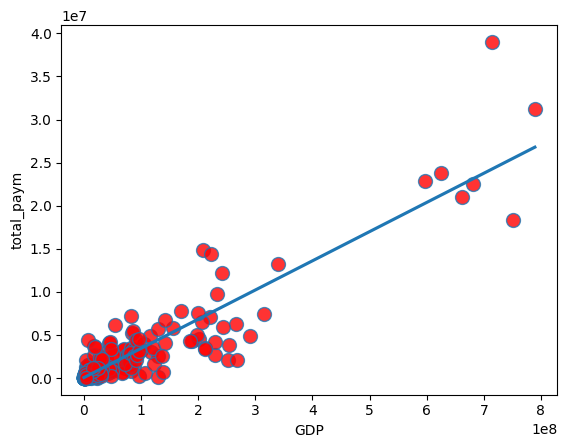

In [113]:
import seaborn as sns
sns.regplot(x='GDP', y='total_paym', data=df, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

## Outlier Treatment

Quantile-based Flooring and Capping In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [114]:
print(df['GDP'].quantile(0.10))
print(df['GDP'].quantile(0.90))

1148102.0
130289317.0


In [115]:
print(df['GDP'].skew())

# remove the outlier
df["GDP"] = np.where(df["GDP"] <1148102, 1148102,df['GDP'])
df["GDP"] = np.where(df["GDP"] >130289317, 130289317,df['GDP'])

print(df['GDP'].skew())

4.33903949120751
1.4001516378808532


The above output shows that the skewness value came down from 4.34 to 1.4, confirming that the distribution has been treated for extreme values.

## 1. Application of Linear Regression - EHR & GDP

Linear regression is suited for estimating continuous values

Linear regression model fit line: The plot shows us how well we are able to fit the relationship between the GDP value and the total payment of EHR.

In [116]:
# ================================================
# Build the model
# ================================================

# Training data
X = df.loc[:,["GDP"]]  # features matrix
y = df.loc[:,'total_paym']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting test set result

In [117]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
234,1241000.00,1.419931e+06
75,701250.00,-1.628958e+05
339,3096834.06,6.397666e+06
88,2592500.34,8.697942e+06
152,395250.00,1.116056e+06


### Checking the residuals 

In [118]:
residuals = y_test - y_pred
residuals.head()

234   -1.789312e+05
75     8.641458e+05
339   -3.300832e+06
88    -6.105442e+06
152   -7.208065e+05
Name: total_paym, dtype: float64

In [119]:
import hvplot.pandas
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

The values seem to align linearly, which shows that the model is acceptable.

### Model Evaluation

Check the coefficients, P values, MAE, MSE, RMSE, R2 square

Coefficients: Quantify the strength of relationship with correaltion(R)

P value: The probability that randomly drawn points will result in the similarly strong relationship, so the smaller the p-value, the more confidence we have in the predictions we make with the line.

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [120]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [121]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GDP,0.06988


Interpreting the coefficients:

Holding all other features fixed, a 1 unit (thousands of dollars) increase in GDP is associated with an increase of $0.034668 in EHR payment.

In [122]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1333210.1884439206
MSE: 4867352708881.257
RMSE: 2206207.7664810396
R2 Square 0.018390953036341418
__________________________________


## Check the distribution of the error terms

In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

In [123]:
# Residual Histogram
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## Comparing machine learning models

### Application of Decision Tree regression

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
#Predicting using test set 
y_pred = model.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [125]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree regression", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1222332.692331072
MSE: 5955644911184.65
RMSE: 2440419.003201018
R2 Square -0.20108717715376656
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/3864298976.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Random Forest Regression

In [126]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
model.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = model.predict(X_test)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [127]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1152559.6225378625
MSE: 5716380692752.804
RMSE: 2390895.3746981076
R2 Square -0.15283426936698485
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/3477842244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Support Vector Regression

In [128]:
from sklearn.svm import SVR
model= SVR(kernel='rbf')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [129]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Support Vector Regression", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1089943.095911663
MSE: 5502959708907.361
RMSE: 2345838.807102347
R2 Square -0.109793219933211
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/865583917.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Random Sample Consensus(RANSAC) Regression

Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

In [130]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
#train_pred = model.predict(X_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


In [131]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Sample Consensus", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 764685.014288082
MSE: 3359961070069.1807
RMSE: 1833019.6589423642
R2 Square 0.3223897298817955
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/4084467583.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Stochastic Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [132]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

In [133]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred),cross_val(SGDRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 764685.014288082
MSE: 3359961070069.1807
RMSE: 1833019.6589423642
R2 Square 0.3223897298817955
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/1340551889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


## Models Comparison

### MAE

<AxesSubplot: ylabel='Model'>

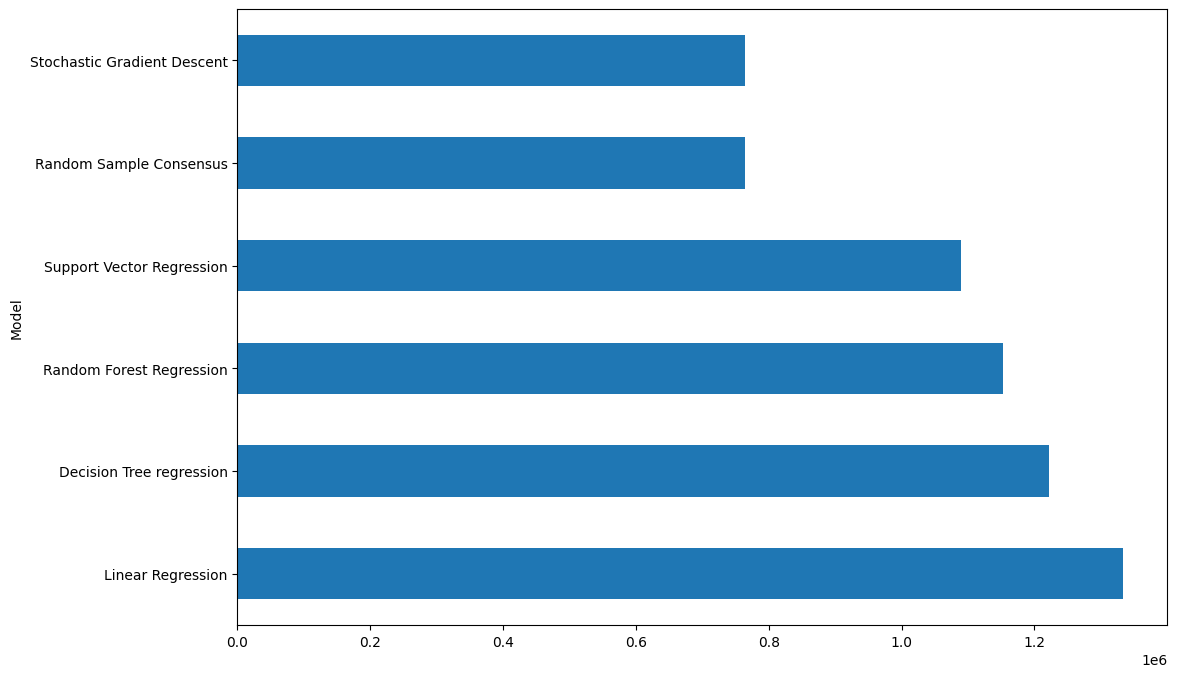

In [134]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

### MSE

<AxesSubplot: ylabel='Model'>

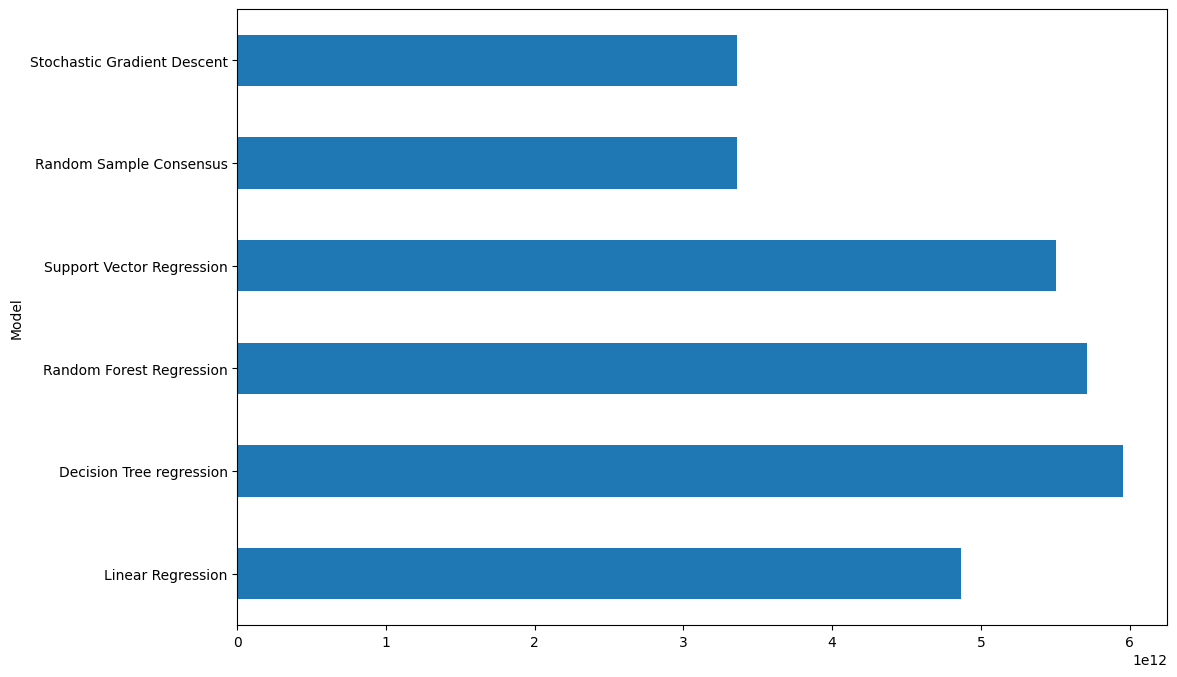

In [135]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

### RMSE

<AxesSubplot: ylabel='Model'>

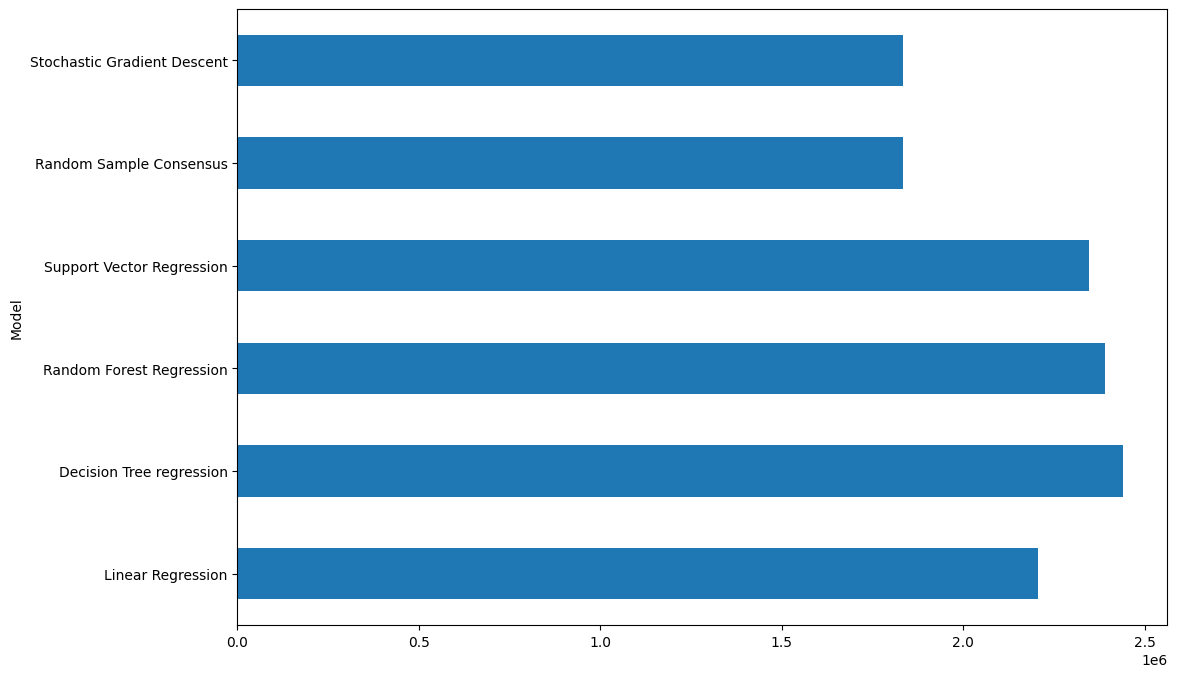

In [136]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

### R2 Square

<AxesSubplot: ylabel='Model'>

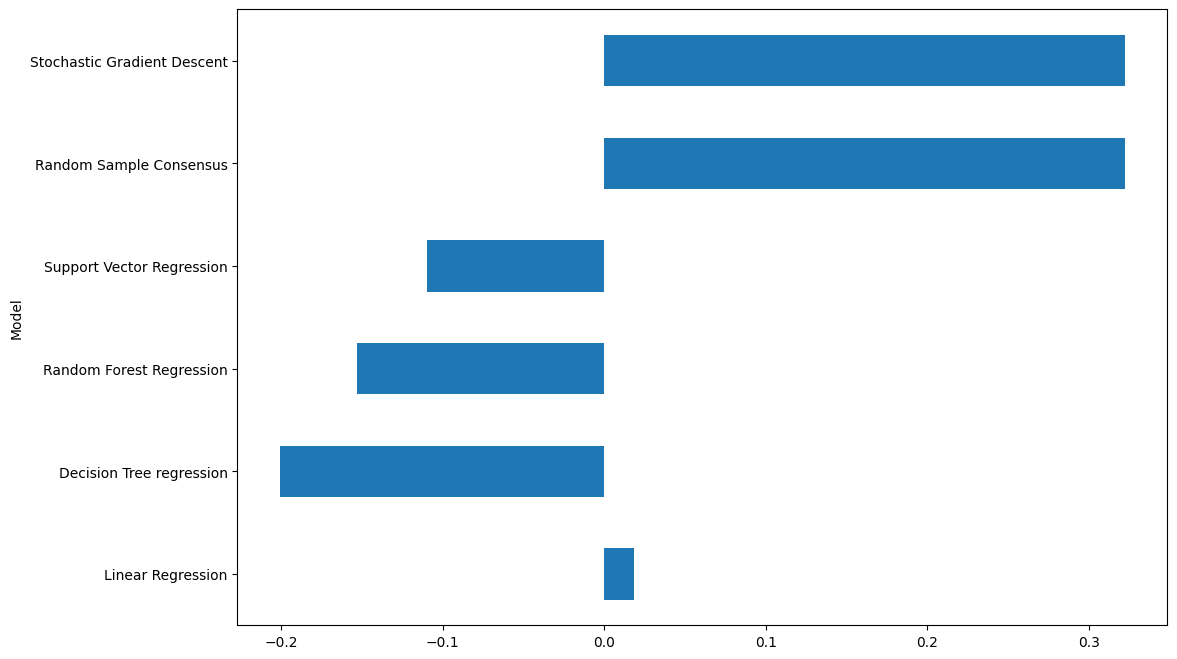

In [137]:
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# 2. Per-capita EHR spending correlation with median income in 2019 

In [138]:
# calculate the per capita payment from EHR 
df["EHR Per Capita"] = (df["total_paym"]/df["Population"])
df.head(10)

,County,Year,Unit of GDP,GDP,total_paym,Population,Median Income,EHR Per Capita
0,Alameda,2013,Thousands of dollars,100521444.0,3315000.00,1563495.0,46217,2.120250
1,Amador,2013,Thousands of dollars,1440258.0,85000.00,36028.0,37846,2.359276
2,Butte,2013,Thousands of dollars,7602095.0,590750.00,221416.0,31630,2.668055
3,Calaveras,2013,Thousands of dollars,1148102.0,21250.00,44852.0,37833,0.473780
4,Colusa,2013,Thousands of dollars,1322530.0,21250.00,21665.0,31123,0.980845
5,Contra Costa,2013,Thousands of dollars,63040706.0,1501666.68,1081948.0,48219,1.387929
6,Del Norte,2013,Thousands of dollars,1148102.0,21250.00,28225.0,31242,0.752879
7,El Dorado,2013,Thousands of dollars,6197638.0,205417.00,182958.0,47590,1.122755
8,Fresno,2013,Thousands of dollars,35768408.0,1561166.67,956967.0,28791,1.631369
9,Glenn,2013,Thousands of dollars,1148102.0,178500.00,28628.0,30416,6.235154


In [139]:
df_2 = df[df["Year"]=="2019"]
df_2.head()

,County,Year,Unit of GDP,GDP,total_paym,Population,Median Income,EHR Per Capita
312,Alameda,2019,Thousands of dollars,130289317.0,6739083.67,1671855.0,60757,4.030902
313,Butte,2019,Thousands of dollars,9893227.0,901000.00,206362.0,35746,4.366114
314,Calaveras,2019,Thousands of dollars,1661687.0,38250.00,44286.0,43184,0.863704
315,Contra Costa,2019,Thousands of dollars,82594531.0,7229250.00,1149800.0,57409,6.287398
316,Del Norte,2019,Thousands of dollars,1148102.0,238000.00,27193.0,34746,8.752252


## Outlier Treatment: Log Transformation

Transformation of the skewed variables may also help correct the distribution of the variables. These could be logarithmic, square root, or square transformations.

In [140]:
import math

df_2['Median Income'] = df_2['Median Income'].apply(lambda x: math.log(x)) # shrink the difference among data
df_2.head()

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/2494199717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Median Income'] = df_2['Median Income'].apply(lambda x: math.log(x)) # shrink the difference among data


,County,Year,Unit of GDP,GDP,total_paym,Population,Median Income,EHR Per Capita
312,Alameda,2019,Thousands of dollars,130289317.0,6739083.67,1671855.0,11.014638,4.030902
313,Butte,2019,Thousands of dollars,9893227.0,901000.00,206362.0,10.484194,4.366114
314,Calaveras,2019,Thousands of dollars,1661687.0,38250.00,44286.0,10.673225,0.863704
315,Contra Costa,2019,Thousands of dollars,82594531.0,7229250.00,1149800.0,10.957956,6.287398
316,Del Norte,2019,Thousands of dollars,1148102.0,238000.00,27193.0,10.455820,8.752252


In [141]:
print(df['Median Income'].skew())
print(df_2['Median Income'].skew())

1.3697688589667447
0.8310212375126736


The above output shows that the skewness value came down from 1.38 to 0.83, confirming that the distribution has been treated for extreme values.

<AxesSubplot: xlabel='Median Income', ylabel='EHR Per Capita'>

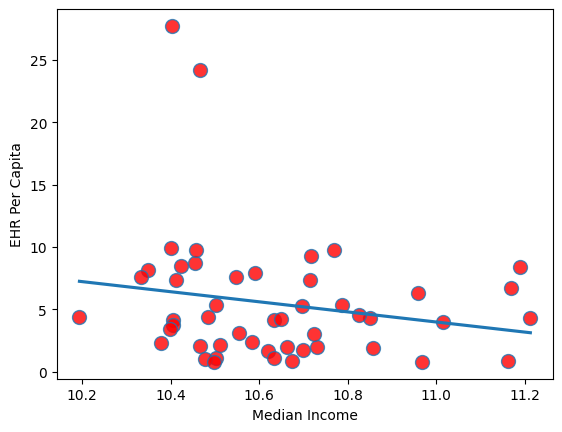

In [142]:
sns.regplot(x='Median Income', y='EHR Per Capita', data=df_2, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

## Application of Linear Regression 

In [143]:
# ================================================
# Build the model
# ================================================

# Training data
X = df_2.loc[:,["Median Income"]]  # features matrix
y = df_2.loc[:,'EHR Per Capita']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting test set result

In [144]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
318,4.124292,7.423519
332,7.585335,6.541004
345,0.871787,2.752209
340,2.065218,7.043845
354,1.008304,6.970076


### Checking the residuals

In [145]:
residuals = y_test - y_pred
residuals.head()

318   -3.299227
332    1.044331
345   -1.880422
340   -4.978627
354   -5.961772
Name: EHR Per Capita, dtype: float64

In [146]:
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

### Model Evaluation

In [147]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Median Income,-6.177453


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in log of Median Income is associated with a decrease of $6.177453 in total payment per capita.

In [148]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 3.4393445286833435
MSE: 14.618733553741967
RMSE: 3.8234452465991935
R2 Square -0.6658575449606308
__________________________________


## Check the distribution of the error terms

In [149]:
# Residual Histogram
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## Comparing machine learning models

### Application of Decision Tree regression

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
#Predicting using test set 
y_pred = model.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [151]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree regression", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 4.561199337140934
MSE: 47.382434549113796
RMSE: 6.883489997749237
R2 Square -4.399399736103687
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/3864298976.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Random Forest Regression

In [152]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
model.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = model.predict(X_test)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [153]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 4.769298838271481
MSE: 39.19202210636883
RMSE: 6.260353193420387
R2 Square -3.4660726244269258
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/3477842244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Application of Support Vector Regression

In [154]:
from sklearn.svm import SVR
model= SVR(kernel='rbf')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [155]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Support Vector Regression", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.32667561190091
MSE: 13.392141530631882
RMSE: 3.65952750100773
R2 Square -0.5260829489756438
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/865583917.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


### Random Sample Consensus(RANSAC) Regression

In [156]:
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
#train_pred = model.predict(X_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


In [157]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Sample Consensus", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/4084467583.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 2.4209927236162567
MSE: 9.113747167529164
RMSE: 3.0188983367329816
R2 Square -0.03854444203929264
__________________________________


### Stochastic Gradient Descent

In [158]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

In [159]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred),cross_val(SGDRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.4209927236162567
MSE: 9.113747167529164
RMSE: 3.0188983367329816
R2 Square -0.03854444203929264
__________________________________


/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_80228/1340551889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


## Models Comparison

### MAE

<AxesSubplot: ylabel='Model'>

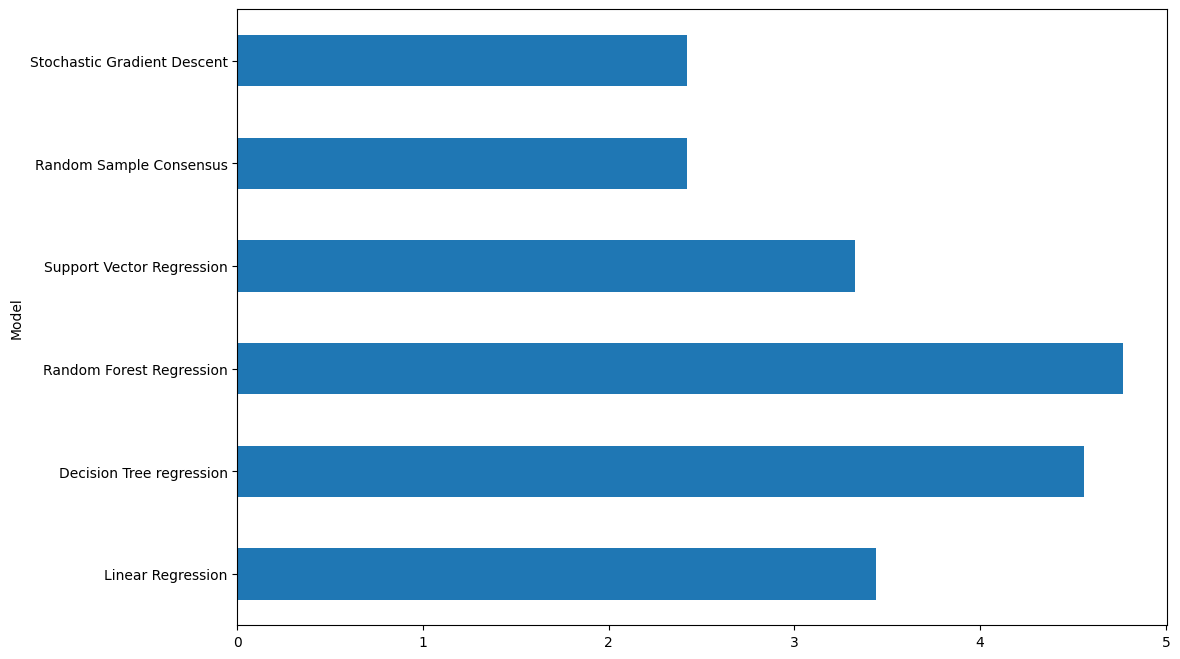

In [160]:
results_df.set_index('Model', inplace=True)
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

### MSE

<AxesSubplot: ylabel='Model'>

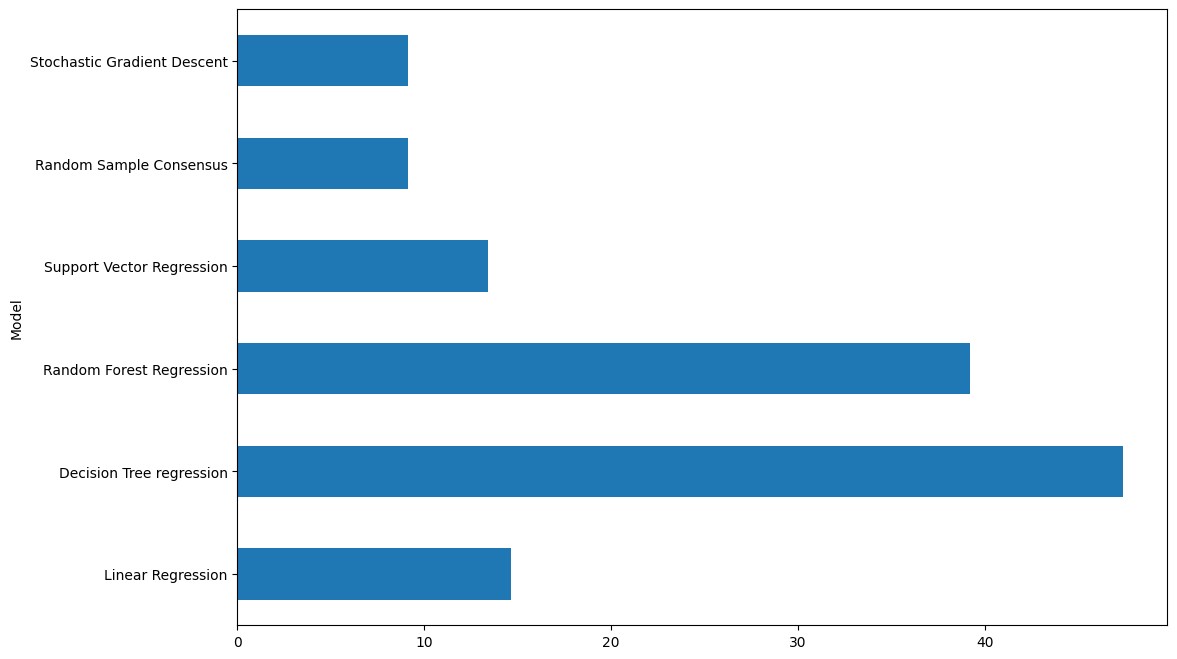

In [161]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

### RMSE

<AxesSubplot: ylabel='Model'>

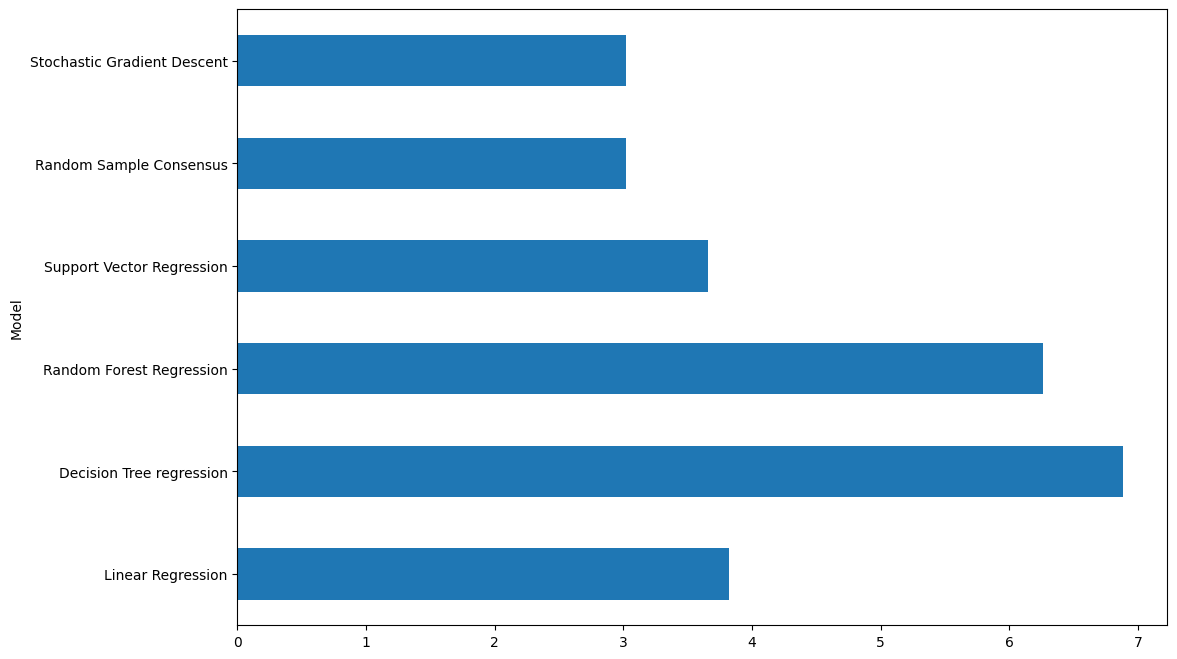

In [162]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

### R2 Square

<AxesSubplot: ylabel='Model'>

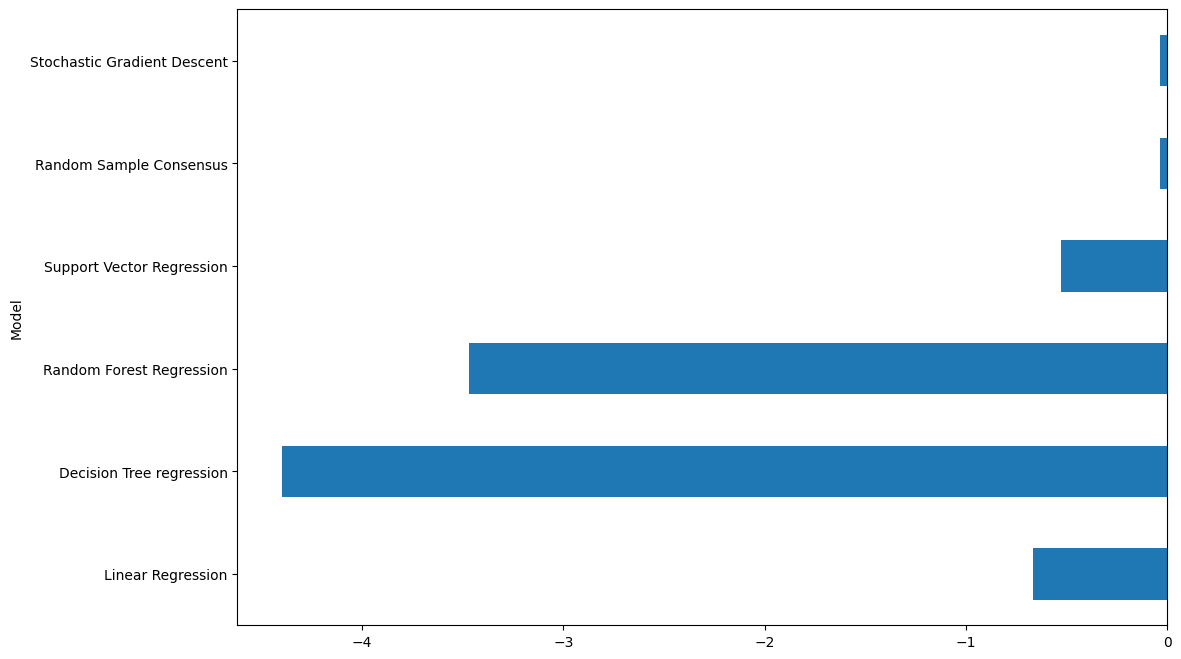

In [163]:
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))